<a href="https://colab.research.google.com/github/VINI-DS001/roteiro-fuzzy/blob/master/Equipe_5_Fuzzy_2_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio: Aplicação Fuzzy

###Você é um engenheiro e precisa criar um sistema de controle de velocidade para um ventilador. Para isso, é necessario que seja criado um código utilizando a logica fuzzy (Fuzzy Inference System) que seja capaz de aplicar a velocidade ideal do ventilador com base em variaveis de temperatura e humidade.

*   Utilize uma biblioteca especializada para implementar o código.
*   Recomenda-se a biblioteca sklearn.




#Configuração do Ambiente

In [ ]:
!pip install numpy scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.5 MB/s eta 0:00:00


#Definição das Variáveis Fuzzy

In [ ]:
# 2. Importação de bibliotecas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 3. Definição das variáveis fuzzy
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

#Definição das Funções de Pertinência

In [ ]:
# 4. Funções de pertinência
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['medium'] = fuzz.trimf(temperature.universe, [15, 25, 35])
temperature['high'] = fuzz.trimf(temperature.universe, [30, 40, 40])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [60, 100, 100])


#Desenvolvimento das Regras Fuzzy

In [ ]:
# 5. Definição das regras fuzzy
rule1 = ctrl.Rule(temperature['low'] & humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['low'] & humidity['medium'], fan_speed['low'])
rule3 = ctrl.Rule(temperature['low'] & humidity['high'], fan_speed['medium'])

rule4 = ctrl.Rule(temperature['medium'] & humidity['low'], fan_speed['medium'])
rule5 = ctrl.Rule(temperature['medium'] & humidity['medium'], fan_speed['medium'])
rule6 = ctrl.Rule(temperature['medium'] & humidity['high'], fan_speed['high'])

rule7 = ctrl.Rule(temperature['high'] & humidity['low'], fan_speed['high'])
rule8 = ctrl.Rule(temperature['high'] & humidity['medium'], fan_speed['high'])
rule9 = ctrl.Rule(temperature['high'] & humidity['high'], fan_speed['high'])

#Criação do Sistema de Controle

In [ ]:
# 6. Criação do sistema de controle
fan_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
fan_simulation = ctrl.ControlSystemSimulation(fan_control)

#Definindo Entradas e Computando Saída

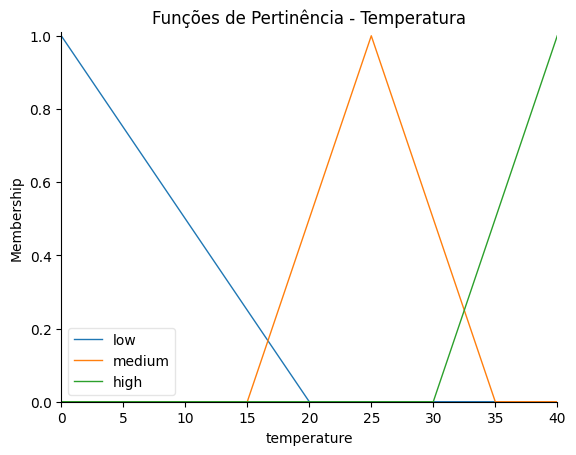

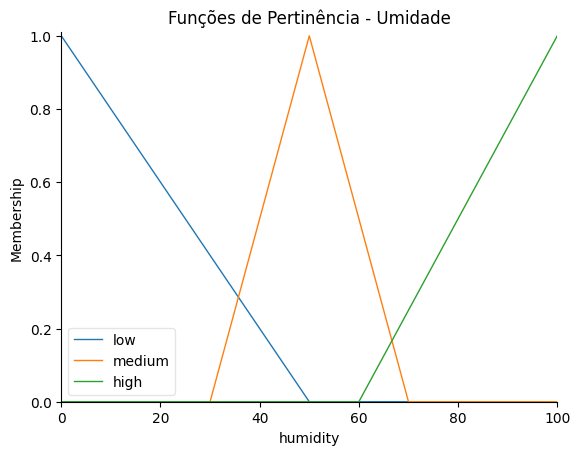

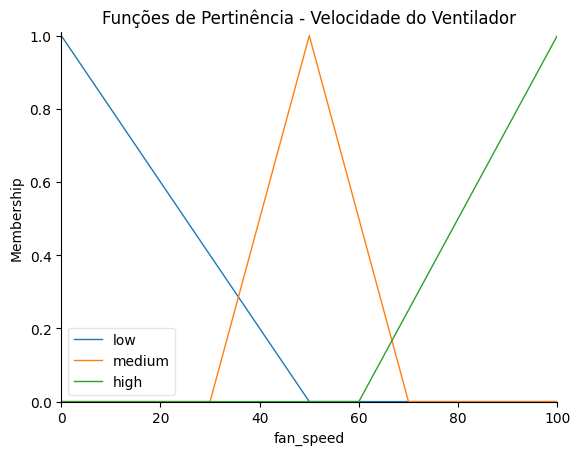

In [ ]:
# 7. Visualização das funções de pertinência
temperature.view()
plt.title("Funções de Pertinência - Temperatura")
plt.show()

humidity.view()
plt.title("Funções de Pertinência - Umidade")
plt.show()

fan_speed.view()
plt.title("Funções de Pertinência - Velocidade do Ventilador")
plt.show()


#Exibir Resultado

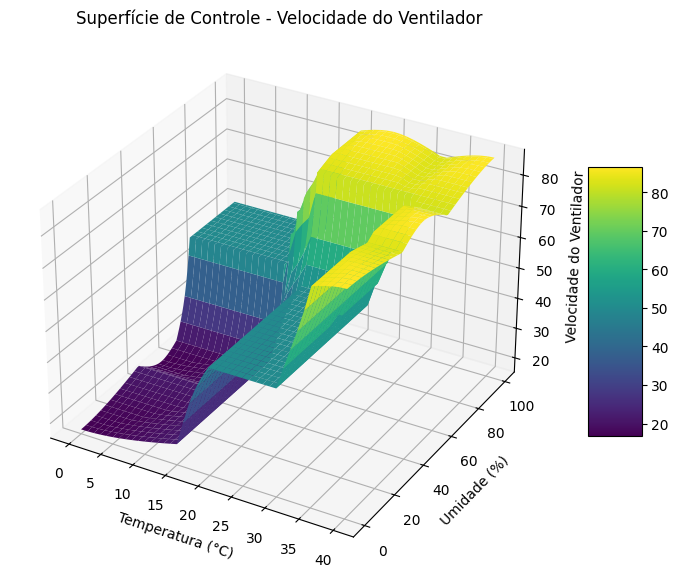

In [ ]:
# 8. Superfície de Controle
temperature_range = np.arange(0, 41, 1)
humidity_range = np.arange(0, 101, 1)
fan_speed_output = np.zeros((len(temperature_range), len(humidity_range)))

for i, temp in enumerate(temperature_range):
    for j, hum in enumerate(humidity_range):
        fan_simulation.input['temperature'] = temp
        fan_simulation.input['humidity'] = hum
        fan_simulation.compute()
        fan_speed_output[i, j] = fan_simulation.output['fan_speed']

temperature_grid, humidity_grid = np.meshgrid(temperature_range, humidity_range)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(temperature_grid, humidity_grid, fan_speed_output.T, cmap='viridis')
ax.set_xlabel('Temperatura (°C)')
ax.set_ylabel('Umidade (%)')
ax.set_zlabel('Velocidade do Ventilador')
ax.set_title("Superfície de Controle - Velocidade do Ventilador")
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()
